In [1]:
from data_utils.prepare_data import load_celebA
from autoencoders.VQ_VAE.VQ_VAE import VQ_VAE
from trainers.autoencoder_trainer import VQVAE_Trainer
from yaml import safe_load
import argparse
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config = safe_load(open("./configs/default.yaml"))
train_dataloader, validation_dataloader, test_dataloader = load_celebA(
        config['img_size'], 
        config['validation_ratio'], 
        config['test_ratio'], 
        config['batch_size']
    )
vqvae_config = config['VQ-VAE']
vqvae = VQ_VAE(
    3, 
    vqvae_config['latent_dimension'], 
    vqvae_config['kernel_sizes'], 
    vqvae_config['res_layers'], 
    vqvae_config['code_book_size']
)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vqvae_config['device'] = device


In [3]:
checkpoint = torch.load('results/best_model.pth')
vqvae.load_state_dict(checkpoint)
_ = vqvae.to(device)

In [4]:
test_image = next(iter(test_dataloader))
rec_images,_,_ = vqvae(test_image.to(device))

In [5]:
def map_to_correct_coordinates(image):
    return (image + 1) / 2

In [6]:
test_image_5 = test_image[:5]
rec_images_5 = rec_images[:5].detach().cpu().numpy()

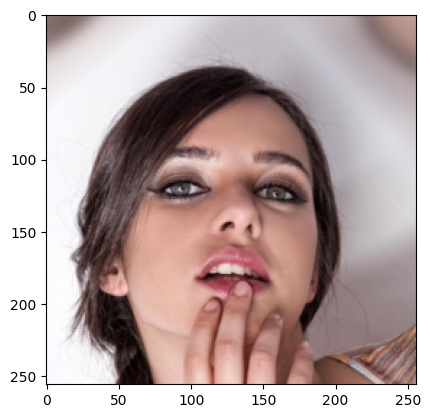

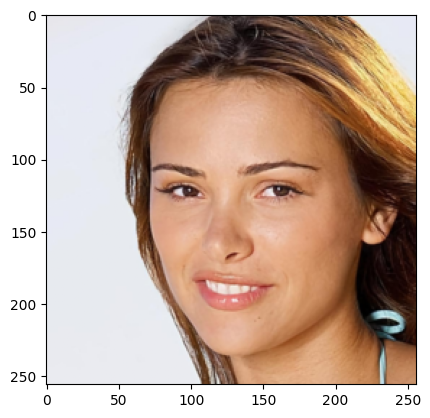

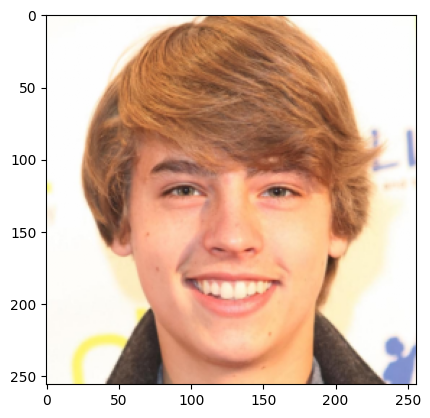

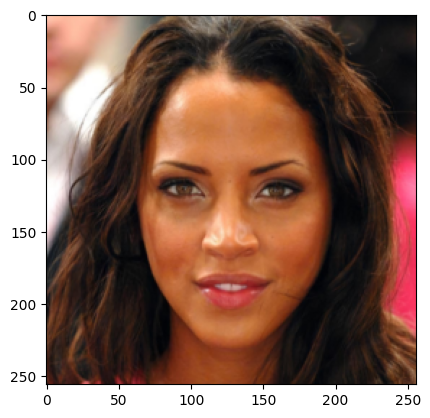

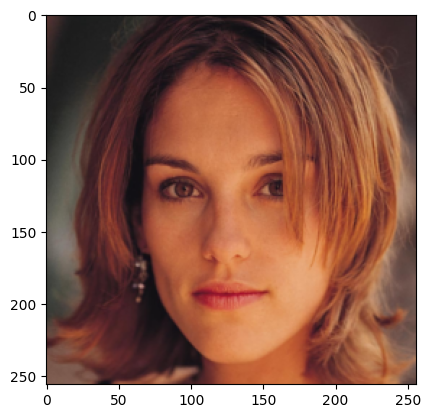

In [7]:
for img in test_image_5:
    img_rearranged = map_to_correct_coordinates(np.transpose(img, (1, 2, 0)))
    plt.imshow(img_rearranged)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


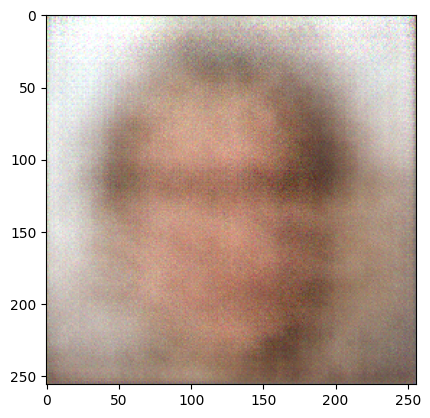

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


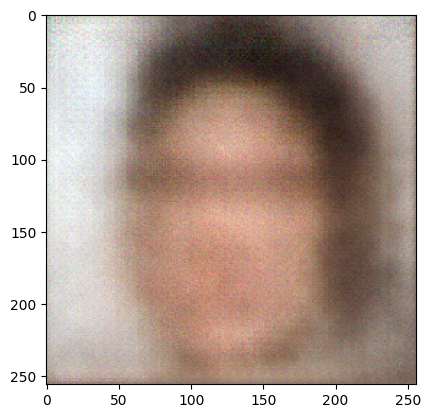

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


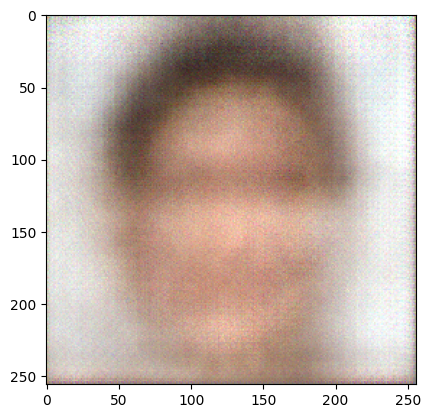

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


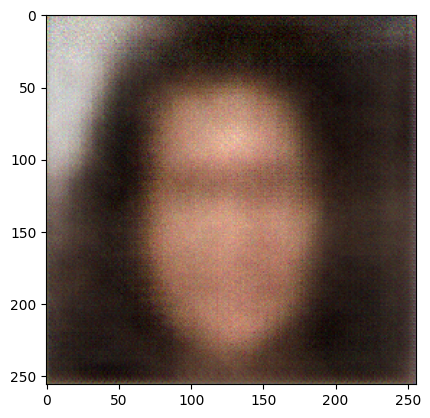

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


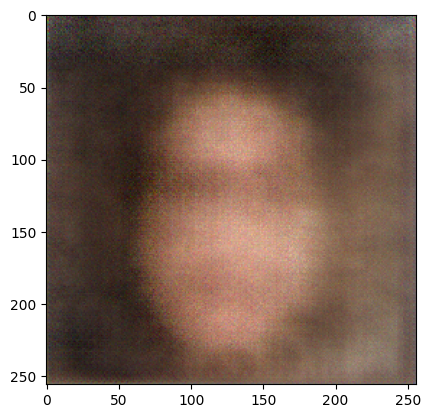

In [8]:
for img in rec_images_5:
    img_rearranged = map_to_correct_coordinates(np.transpose(np.array(img), (1, 2, 0)))
    plt.imshow(img_rearranged)
    plt.show()